In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
#from tensorflow.keras.utils import normalize, to_categorical
from sklearn.model_selection import train_test_split

In [12]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install tensorflow

In [ ]:
from tensorflow.keras.utils import normalize, to_categorical


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense 

In [8]:
image_directory='C:/Users/Dell/Desktop/PROJECT/datasets/'
no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')

print('No Tumor: ', len(no_tumor_images))
print('Tumor: ',len(yes_tumor_images))

No Tumor:  1500
Tumor:  1500


In [17]:
pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [5]:
dataset=[]
label=[]

INPUT_SIZE=64

In [6]:
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [7]:
for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [8]:
dataset=np.array(dataset)
label=np.array(label)

print('Dataset: ',len(dataset))
print('Label: ',len(label))

Dataset:  3000
Label:  3000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=2023)

In [10]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)


In [12]:
model=Sequential()

model.add(Conv2D(32, (3,3),activation='relu', input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3),activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, 
batch_size=32, 
verbose=1, epochs=100, 
validation_data=(X_test, y_test),
shuffle=False)

Epoch 1/100
75/75 [==============================] - 8s 91ms/step - loss: 0.5615 - accuracy: 0.7167 - val_loss: 0.4890 - val_accuracy: 0.7800
Epoch 2/100
75/75 [==============================] - 6s 77ms/step - loss: 0.4570 - accuracy: 0.7887 - val_loss: 0.3964 - val_accuracy: 0.8300
Epoch 3/100
75/75 [==============================] - 5s 72ms/step - loss: 0.3679 - accuracy: 0.8500 - val_loss: 0.3047 - val_accuracy: 0.8850
Epoch 4/100
75/75 [==============================] - 5s 73ms/step - loss: 0.2859 - accuracy: 0.8833 - val_loss: 0.2543 - val_accuracy: 0.9050
Epoch 5/100
75/75 [==============================] - 6s 78ms/step - loss: 0.2268 - accuracy: 0.9146 - val_loss: 0.2130 - val_accuracy: 0.9183
Epoch 6/100
75/75 [==============================] - 6s 73ms/step - loss: 0.1767 - accuracy: 0.9371 - val_loss: 0.1777 - val_accuracy: 0.9333
Epoch 7/100
75/75 [==============================] - 6s 75ms/step - loss: 0.1228 - accuracy: 0.9588 - val_loss: 0.1457 - val_accuracy: 0.9417
Epoch 

In [15]:
model.save('BrainTumorBig.h5')

In [ ]:
model = load_model('BrainTumorBig.h5')

In [ ]:
def make_prediction(img):
    
    input_img = np.expand_dims(img, axis=0)
    
    res = (model.predict(input_img) > 0.5).astype("int32")
    return res

In [ ]:
def show_result(img):
    img_path = f"{image_directory}pred/{img}"
    image = cv2.imread(img_path)

    img = Image.fromarray(image)

    img = img.resize((64,64))

    img = np.array(img)
    
    plt.imshow(img)
    plt.show()
    
    pred = make_prediction(img)
    if pred:
        print("Tumor Detected")
    else:
        print("No Tumor")

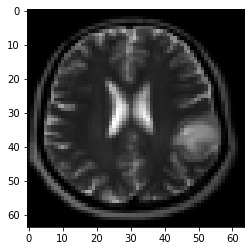

1/1 [==============================] - 0s 255ms/step
No Tumor


In [ ]:
show_result('dataset\yes\y2.jpg')

In [10]:
def show_result(img):
    img_path = f"{image_directory}yes/{img}"
    image = cv2.imread(img_path)

    img = Image.fromarray(image)

    img = img.resize((64,64))

    img = np.array(img)
    
    
    
    pred = make_prediction(img)
    if pred:
        return("Tumor Detected")
    else:
        return("No Tumor")

In [11]:
alist=[]
blist=[]
for i in range(0,1500):
    a=str(i)
    path0="y"+a+".jpg"
    c=show_result(path0)
    alist.append(path0)
    blist.append(c)
   
   
    
    
    


1/1 [==============================] - 0s 18ms/step


In [12]:
print(blist.count("No Tumor"))
print(blist.count("Tumor Detected"))

211
1289


In [23]:
def show_result(img):
    img_path = f"{image_directory}no/{img}"
    image = cv2.imread(img_path)

    img = Image.fromarray(image)

    img = img.resize((64,64))

    img = np.array(img)
    
    
    
    pred = make_prediction(img)
    if pred:
        return("Tumor Detected")
    else:
        return("No Tumor")

In [24]:
a2list=[]
b2list=[]
for i in range(0,1499):
    a2=str(i)
    path1="no"+a2+".jpg"
    c2=show_result(path1)
    a2list.append(path1)
    b2list.append(c2)
   
   

1/1 [==============================] - 0s 16ms/step


In [25]:
print(b2list.count("Tumor Detected"))
print(b2list.count("No Tumor"))

65
1434
